SMS CLASSIFIER USING FIVE ADVANCED CLASSIFIERS

In [32]:
#IMPORTING THE NECESSARY LIBARARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
#LOADING THE DATASET
df=pd.read_csv('/content/spam.csv',encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])

In [5]:
#PRINTING THE FIRST 5 ROWS
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#PRINTING THE LAST 5 ROWS
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
#EXPLORATORY DATA ANALYSIS(EDA)
#PRINTING THE INFORMATION OF THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
#PRINTING THE SHAPE OF THE DATASET
df.shape

(5572, 2)

In [10]:
#GETTING THE LABEL COUNTS
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
#TYPE OF THE DATASET
type(df)

pandas.core.frame.DataFrame

In [12]:
#VIEWING THE COLUMN NAMES
list(df.columns)

['label', 'message']

In [13]:
#VIEWING PARTICULAR COLUMN USING SLICING
df['message'][0:10]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: message, dtype: object

In [14]:
#TO VIEW TOP 10
top_10=df.head(10)
top_10

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [17]:
#SPLITTING DATSET INTO TRAINING AND TESTING SETS
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#DEFINING A FUNCTION TO EVALUATE THE CLASSIFIERS
def evaluate_classifier(clf, X_train, y_train, cv=5):
    pipeline = make_pipeline(TfidfVectorizer(), clf)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    return scores.mean()

In [19]:
#THE FIVE CLASSIFIERS
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}


In [20]:
#EVALUATING THE CLASSIFIERS
results = {}
for clf_name, clf in classifiers.items():
    accuracy = evaluate_classifier(clf, X_train, y_train)
    results[clf_name] = accuracy

<ipython-input-30-976f88913691>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


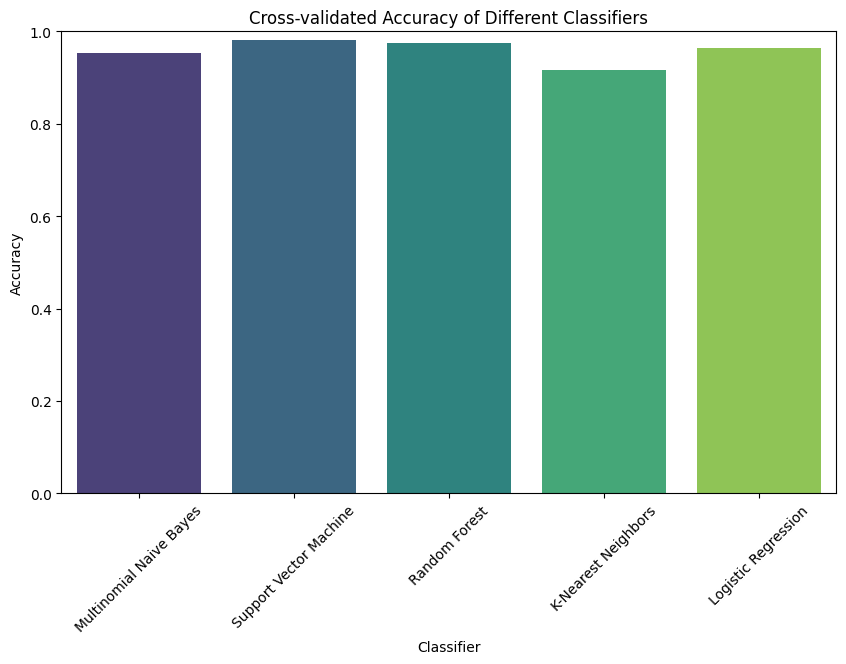

In [30]:
#DATA VISUALIZATION
#PLOTTING THE ACCURACIES OF EACH CLASSIFIERS
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Cross-validated Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [21]:
#PRINTING THE RESULTS
print("Classifier Performance (Cross-validated Accuracy):\n")
for clf_name, accuracy in results.items():
    print(f"{clf_name}: {accuracy:.4f}")

Classifier Performance (Cross-validated Accuracy):

Multinomial Naive Bayes: 0.9545
Support Vector Machine: 0.9814
Random Forest: 0.9742
K-Nearest Neighbors: 0.9159
Logistic Regression: 0.9648


In [22]:
#TRAIN THE BEST CLASSIFIER ON FULL TRAINING SET AND EVALUATE ON THE TEST SET
best_classifier_name = max(results, key=results.get)
best_classifier = classifiers[best_classifier_name]

In [23]:
#TRAIN ON FULL TRAINING DATA
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
best_classifier.fit(X_train_tfidf, y_train)

SVC()

In [24]:
#EVALUATE ON TEST SET
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = best_classifier.predict(X_test_tfidf)

In [26]:
#CALCULATING EVALUATION METRICS
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

In [28]:
#PRINTING THE EVALUATION METRICS
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Test Set Performance:
Accuracy: 0.9821
Precision: 1.0000
Recall: 0.8667
F1 Score: 0.9286


<ipython-input-40-16a8f0fd5a90>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


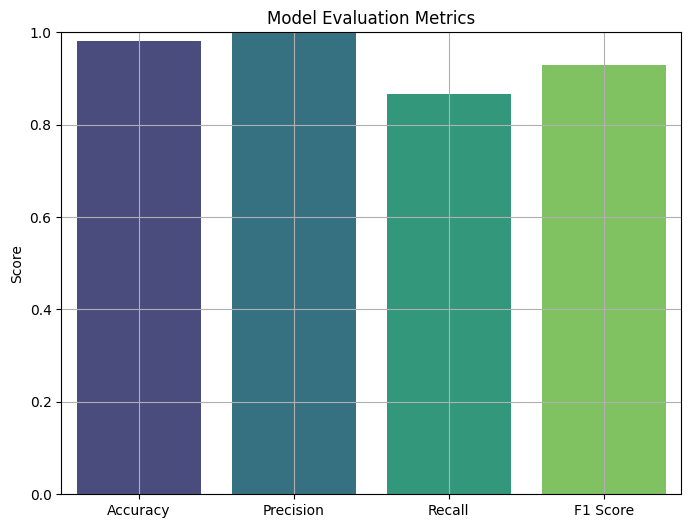

In [40]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.9821, 1.0000, 0.8667, 0.9286]

#PLOTTING EVALUATION METRICS
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid()
plt.show()


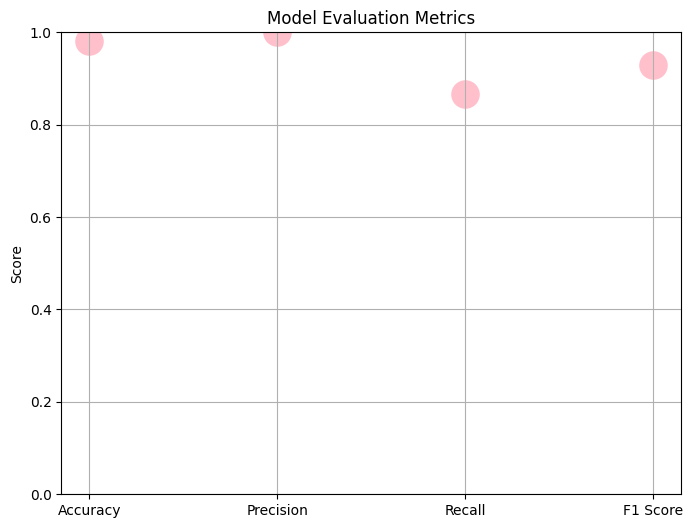

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=metrics, y=values, color='pink',s=500)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid()
plt.show()


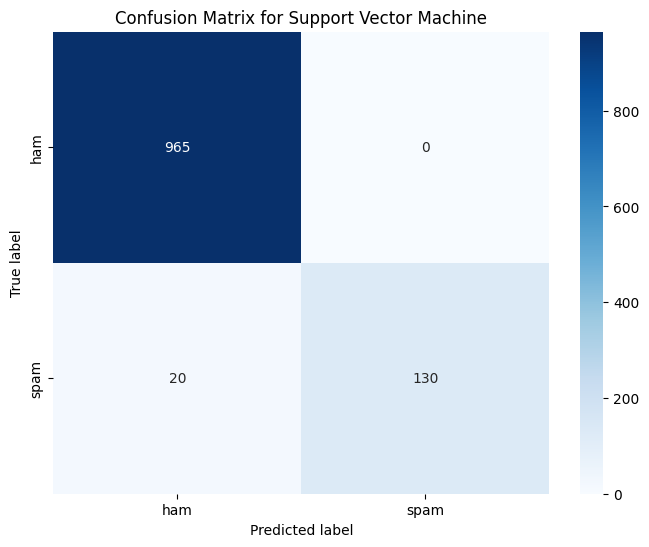

In [33]:
#VISUALIZATION OF CONFUSION MATRIX FOR BEST CLASSIFIER
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title(f'Confusion Matrix for {best_classifier_name}')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()